In [1]:
# 1 - Загрузить датасет
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("Engg_College_Data.csv")

Saving Engg_College_Data.csv to Engg_College_Data.csv


In [2]:
# 2 - Исследовать данные
print('Размерность:', df.shape)
print('Типы данных:', df.dtypes)
print('Строки с пропусками:', df.isna().sum())
df = df.dropna(axis=0, how='any')
print('После очистки:', df.isna().sum())

Размерность: (26, 7)
Типы данных: SR_NO              int64
Engg_College      object
Teaching           int64
Fees               int64
Placements         int64
Internship         int64
Infrastructure     int64
dtype: object
Строки с пропусками: SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64
После очистки: SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64


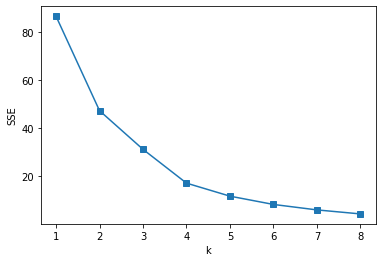

In [6]:
# 3&4 - Выбор переменных и метод локтя
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
"""
Зависимость налогов от уровня инфраструктуры показывает справедливость распределения
финансов администрациеей колледжа, следственно, можно кластеризовать по этим двум
метрикам.
""" 
X = df.loc[:, ['Fees', 'Infrastructure']]
SSE = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [11]:
# 5 - Разбиение на кластеры
kmeans = KMeans(n_clusters=4) # По методу локтя (см. график выше)
kmeans.fit(X)
Y_pred = kmeans.labels_
X['Cluster'] = Y_pred
X
# Игроки в кластерах имеют приблизительно одинаковую зависимость инфраструктуры от налогов

,Fees,Infrastructure,Cluster
0,2,3,0
1,2,3,0
2,5,5,1
3,4,4,1
4,5,5,1
5,4,4,1
6,3,2,0
7,4,5,1
8,4,4,1
9,4,5,1


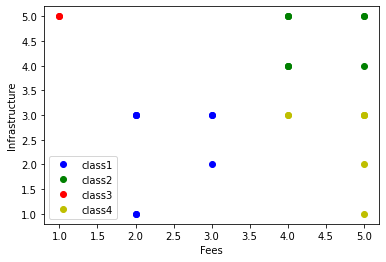

In [13]:
# 6 - Визуализация
import matplotlib.pyplot as plt
plt.plot(X[X['Cluster']==0]['Fees'], X[X['Cluster']==0]['Infrastructure'], 'bo', label='class1')
plt.plot(X[X['Cluster']==1]['Fees'], X[X['Cluster']==1]['Infrastructure'], 'go', label='class2')
plt.plot(X[X['Cluster']==2]['Fees'], X[X['Cluster']==2]['Infrastructure'], 'ro', label='class3')
plt.plot(X[X['Cluster']==3]['Fees'], X[X['Cluster']==3]['Infrastructure'], 'yo', label='class4')
plt.xlabel('Fees')
plt.ylabel('Infrastructure')
plt.legend(loc=0)
plt.show()